## Case Law DB to Network format

This notebook can be used if you already have a collection of ECLI identifiers and references between them. Let the following be the path to a csv file with two columns for the identifiers of the 'from' and 'to' cases:

In [34]:
import pandas as pd
import numpy as np
import requests
import urllib
import os
%matplotlib inline

In [2]:
cases_df = pd.read_json('cases_and_citations.json')

In [3]:
cases_df.head()

,id,date,description,venue,procedure_type,subject,court,source_ecli,target_ecli,idT,dateT,descriptionT,venueT,procedure_typeT,subjectT,courtT
0,3486,2005-05-04,\n Bij besluit van 26 februari 2004 heeft...,NaN,Eerste aanleg - meervoudig,Bestuursrecht,Raad van State,ECLI:NL:RVS:2005:AT5086,ECLI:NL:RVS:2006:AY5483,4985,2006-07-28,\n Bij besluit van 26 februari 2004 heeft...,None,Voorlopige voorziening,Bestuursrecht,Raad van State
1,3503,2005-05-18,\n Bij besluit van 20 december 2000 heeft...,NaN,Hoger beroep,Bestuursrecht,Raad van State,ECLI:NL:RVS:2005:AT5690,ECLI:NL:RVS:2006:AY0390,4958,2006-07-05,\n Bij besluit van 16 februari 2004 heeft...,None,Hoger beroep,Bestuursrecht,Raad van State
2,3229,2005-06-07,\n Bekendmaking besluit; ingangsdatum bez...,NaN,Hoger beroep,Bestuursrecht,Centrale Raad van Beroep,ECLI:NL:CRVB:2005:AT7061,ECLI:NL:CRVB:2006:AX7443,4325,2006-06-01,\n Bezwaar is ontvankelijk omdat geen spr...,Utrecht,Hoger beroep,Bestuursrecht,Centrale Raad van Beroep
3,309,2001-05-04,"\n -<para xmlns=""http://www.rechtspraak.n...",NaN,Cassatie,Civiel recht,Hoge Raad,ECLI:NL:HR:2001:AB1426,ECLI:NL:RBMID:2005:AY8012,3780,2005-09-14,"\n \n <parablock xmlns=""http://www...",None,Eerste aanleg - enkelvoudig,Civiel recht,Rechtbank Middelburg
4,1484,2003-04-29,"\n -<para xmlns=""http://www.rechtspraak.n...",NaN,Hoger beroep,Civiel recht,Gerechtshof Arnhem,ECLI:NL:GHARN:2003:AF8457,ECLI:NL:HR:2004:AR2773,2782,2004-12-17,\n 17 december 2004 Eerste Kamer Nr. C03/...,None,Cassatie,Civiel recht,Hoge Raad


---
#### Links

In [4]:
#semantic link "http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:HR:2000:AA5634"
cases_df['link_id'] = cases_df['source_ecli'] + cases_df['target_ecli']
links = cases_df[['link_id','source_ecli','target_ecli']]\
    .reset_index(drop=True)\
    .rename(columns={'link_id':'id','source_ecli':'source','target_ecli':'target'})

In [5]:
links['source'] = ['http://deeplink.rechtspraak.nl/uitspraak?id='+str(i) for i in links['source']] 
links['target'] = ['http://deeplink.rechtspraak.nl/uitspraak?id='+str(i) for i in links['target']] 
links = links.to_dict(orient='records')

In [6]:
links[0]

{'id': 'ECLI:NL:RVS:2005:AT5086ECLI:NL:RVS:2006:AY5483',
 'source': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:RVS:2005:AT5086',
 'target': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:RVS:2006:AY5483'}

---
#### Nodes

In [7]:
cases_df.head()

,id,date,description,venue,procedure_type,subject,court,source_ecli,target_ecli,idT,dateT,descriptionT,venueT,procedure_typeT,subjectT,courtT,link_id
0,3486,2005-05-04,\n Bij besluit van 26 februari 2004 heeft...,NaN,Eerste aanleg - meervoudig,Bestuursrecht,Raad van State,ECLI:NL:RVS:2005:AT5086,ECLI:NL:RVS:2006:AY5483,4985,2006-07-28,\n Bij besluit van 26 februari 2004 heeft...,None,Voorlopige voorziening,Bestuursrecht,Raad van State,ECLI:NL:RVS:2005:AT5086ECLI:NL:RVS:2006:AY5483
1,3503,2005-05-18,\n Bij besluit van 20 december 2000 heeft...,NaN,Hoger beroep,Bestuursrecht,Raad van State,ECLI:NL:RVS:2005:AT5690,ECLI:NL:RVS:2006:AY0390,4958,2006-07-05,\n Bij besluit van 16 februari 2004 heeft...,None,Hoger beroep,Bestuursrecht,Raad van State,ECLI:NL:RVS:2005:AT5690ECLI:NL:RVS:2006:AY0390
2,3229,2005-06-07,\n Bekendmaking besluit; ingangsdatum bez...,NaN,Hoger beroep,Bestuursrecht,Centrale Raad van Beroep,ECLI:NL:CRVB:2005:AT7061,ECLI:NL:CRVB:2006:AX7443,4325,2006-06-01,\n Bezwaar is ontvankelijk omdat geen spr...,Utrecht,Hoger beroep,Bestuursrecht,Centrale Raad van Beroep,ECLI:NL:CRVB:2005:AT7061ECLI:NL:CRVB:2006:AX7443
3,309,2001-05-04,"\n -<para xmlns=""http://www.rechtspraak.n...",NaN,Cassatie,Civiel recht,Hoge Raad,ECLI:NL:HR:2001:AB1426,ECLI:NL:RBMID:2005:AY8012,3780,2005-09-14,"\n \n <parablock xmlns=""http://www...",None,Eerste aanleg - enkelvoudig,Civiel recht,Rechtbank Middelburg,ECLI:NL:HR:2001:AB1426ECLI:NL:RBMID:2005:AY8012
4,1484,2003-04-29,"\n -<para xmlns=""http://www.rechtspraak.n...",NaN,Hoger beroep,Civiel recht,Gerechtshof Arnhem,ECLI:NL:GHARN:2003:AF8457,ECLI:NL:HR:2004:AR2773,2782,2004-12-17,\n 17 december 2004 Eerste Kamer Nr. C03/...,None,Cassatie,Civiel recht,Hoge Raad,ECLI:NL:GHARN:2003:AF8457ECLI:NL:HR:2004:AR2773


In [8]:
data_nodes = pd.DataFrame()
data_nodes = data_nodes.append(cases_df[['id','source_ecli','date','description','procedure_type','subject','court']]\
    .rename(columns={'source_ecli':'ecli','description':'abstract','court':'creator','procedure_type':'community'}))
data_nodes = data_nodes.append(cases_df[['idT','target_ecli','dateT','descriptionT','procedure_typeT','subjectT','courtT']]\
    .rename(columns={'target_ecli':'ecli','dateT':'date','descriptionT':'abstract',
    'procedure_typeT':'community','subjectT':'subject','courtT':'creator','idT':'id'
}))
data_nodes = data_nodes.drop_duplicates(subset ="ecli", keep='first') #only unique eclis (cases)

In [9]:
data_nodes.head(3)

,id,ecli,date,abstract,community,subject,creator
0,3486,ECLI:NL:RVS:2005:AT5086,2005-05-04 00:00:00,\n Bij besluit van 26 februari 2004 heeft...,Eerste aanleg - meervoudig,Bestuursrecht,Raad van State
1,3503,ECLI:NL:RVS:2005:AT5690,2005-05-18 00:00:00,\n Bij besluit van 20 december 2000 heeft...,Hoger beroep,Bestuursrecht,Raad van State
2,3229,ECLI:NL:CRVB:2005:AT7061,2005-06-07 00:00:00,\n Bekendmaking besluit; ingangsdatum bez...,Hoger beroep,Bestuursrecht,Centrale Raad van Beroep


In [10]:
#this to have the same format as the cases
data_nodes['id'] = ['http://deeplink.rechtspraak.nl/uitspraak?id='+str(i) for i in data_nodes['ecli']]#[str(i)[:-2] for i in data_nodes.id]
data_nodes['title'] = [str(i)+' -'+str(j)[5:]+'- '+str(k) for i,j,k in zip(data_nodes['creator'], data_nodes['ecli'], data_nodes['community'])]
data_nodes['year'] = [int(1990) if str(i)[0:4] == 'None' else int(str(i)[0:4]) for i in data_nodes.date]
data_nodes['date'] = [str(i)[0:10] for i in data_nodes.date]
data_nodes['count_version'] = np.NaN
data_nodes['count_annotation'] = [int(i) for i in np.random.uniform(0,5,len(data_nodes))]
data_nodes['articles'] = [ [] for _ in range(len(data_nodes))]
data_nodes['authorities'] = 0#np.NaN
data_nodes['hubs'] = 0#np.NaN
data_nodes['pagerank'] = 0#np.NaN

In [11]:
nodes = data_nodes.to_dict(orient='records')

In [12]:
nodes[0]

{'id': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:RVS:2005:AT5086',
 'ecli': 'ECLI:NL:RVS:2005:AT5086',
 'date': '2005-05-04',
 'abstract': '\n      Bij besluit van 26 februari 2004 heeft de gemeenteraad van Ruurlo, thans Berkelland, op voorstel van het college van burgemeester en wethouders van 29 januari 2004, het bestemmingsplan "Slootsdijk 2/Hillebrandsweg" vastgesteld.<para xmlns="http://www.rechtspraak.nl/schema/rechtspraak-1.0" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">Bij besluit van 26 februari 2004 heeft de gemeenteraad van Ruurlo, thans Berkelland, op voorstel van het college van burgemeester en wethouders van 29 januari 2004, het bestemmingsplan "Slootsdijk 2/Hillebrandsweg" vastgesteld.</para>\n    \n    \n  ',
 'community': 'Eerste aanleg - meervoudig',
 'subject': 'Bestuursrecht',
 'creator': 'Raad van State',
 'title': 'Raad van State -NL:RVS:2005:AT5086- Eerste aanleg - meervoudig',
 'year': 2005,
 'cou

In [13]:
import networkx as nx
from networkx.readwrite import json_graph

In [14]:
def get_network(nodes, links):
    graph = json_graph.node_link_graph({'nodes': nodes, 'links': links}, directed=True, multigraph=False)
    return graph

In [15]:
#g = get_network(nodes, links)

In [16]:
def add_network_statistics(nodes, links):
    if len(nodes)==0:
        return nodes
    graph = get_network(nodes, links)
    degree = nx.degree(graph)
    if max(dict(degree).values()) > 0:
#        hubs, authorities = get_hits(graph)
        statistics = {
            'degree': degree,
            'in_degree': graph.in_degree(),
            'out_degree': graph.out_degree(),
            'degree_centrality': nx.degree_centrality(graph),
            'in_degree_centrality': nx.in_degree_centrality(graph),
            'out_degree_centrality': nx.out_degree_centrality(graph),
            'betweenness_centrality': nx.betweenness_centrality(graph),
            'closeness_centrality': nx.closeness_centrality(graph),
#            'pagerank': get_pagerank(graph),
#            'hubs': hubs,
#            'authorities': authorities
        }
    else:
        statistics = {}

    # for relative in-degree we sort on date
 #   derive_date = lambda k: k['date'] if k['date']!='' else '{}-01-01'.format(k['year'])
 #   nodes.sort(key=derive_date, reverse=True)
    for i, node in enumerate(nodes):
        nodeid = node['id']
        for var in statistics.keys():
            node[var] = statistics[var][nodeid]
        if 'in_degree' in node:
            node['rel_in_degree'] = node['in_degree'] / float(max(i, 1))
 #   get_community(graph, nodes)
    return nodes

In [17]:
nodes = add_network_statistics(nodes, links)

In [18]:
nodes[5]

{'id': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:GHSHE:2004:AO5141',
 'ecli': 'ECLI:NL:GHSHE:2004:AO5141',
 'date': '2004-03-02',
 'abstract': '\n      \n        <parablock xmlns="http://www.rechtspraak.nl/schema/rechtspraak-1.0" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">\n        <para>Verbindendheid van de Wet op kansspelen in verband met het vrij verrichten van diensten als bedoeld in het EG-verdrag.</para>\n        <para>Overtreding van de Wet op de kansspelen. Verdachte is niet slechts opgetreden als tussenpersoon voor degenen die wensten deel te nemen aan een Duits lottospel, doch heeft ook zonder vergunning voor rekening en risico van verdachte nieuwe kanselementen toegevoegd aan de door de Duitse lotto aangeboden kansspelen.</para>\n      </parablock>\n    \n    \n  ',
 'community': 'Hoger beroep',
 'subject': 'Strafrecht',
 'creator': "Gerechtshof 's-Hertogenbosch",
 'title': "Gerechtshof 's-Hertogenbosch -NL:

---
#### Dump into graph library

In [19]:
graph = get_network(nodes, links)
positions = nx.spring_layout(graph, dim=2, center =[0.5,0.5], iterations=8, scale=0.6)

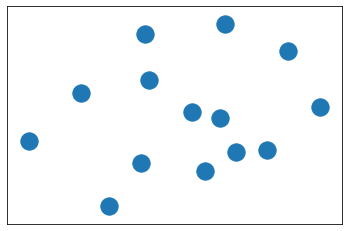

In [20]:
nx.draw_networkx_nodes(graph,positions)

In [21]:
#positions

In [22]:
# for node in nodes:
#     x = positions[str(node['id'])][0]
#     y = positions[str(node['id'])][1]
#     if x < 0:
#         node['x'] = x*(-1)
#     elif x > 0:
#         node['x'] = x*(2)
#     elif y < 0:
#         node['y'] = x*(-1)
#     elif y > 0:
#         node['y'] = x*(2)

#     node['x'] = positions[str(node['id'])][0]
#     node['y'] = positions[str(node['id'])][1]

In [23]:
import random
import json

def to_d3_json(nodes, links, filename):
    with open(filename, 'w') as outfile:
        json.dump({'nodes': nodes, 'links': links}, fp=outfile)


def to_sigma_json(nodes, links, title, filename=None):
    # Add random start position
    nodes = [node.copy() for node in nodes]
    for node in nodes:
        x = positions[str(node['id'])][0]
        y = positions[str(node['id'])][1]
        node['x'] = min(.99, abs(x))
        node['y'] = min(.99, abs(y))
    if filename is None:
        return json.dumps({'title': title, 'edges': links, 'nodes': nodes})
    with open(filename, 'w') as outfile:
        json.dump({'title': title, 'edges': links, 'nodes': nodes}, fp=outfile)
        
#         x = positions[str(node['id'])][0]
#         if x < 0:
#             node['x'] = x*(-0.2)
#         else:
#             node['x'] = x*(1.1)
#         y = positions[str(node['id'])][1]
#         if y < 0:
#             node['y'] = y*(-0.2)
#         else:
#             node['y'] = y*(0.99)

In [24]:
outpath = 'network_cases_sigma.json'
to_sigma_json(filename=outpath, nodes=nodes, links=links, title='Rechtspraak')

In [25]:
# outpath = 'network_cases_D3.json'
# to_d3_json(nodes=nodes, links=links, filename=outpath)

---
## Mapping

In [26]:
import json

In [27]:
with open('network_cases_sigma.json', 'r') as f:
        netw = json.load(f)

In [28]:
len(netw['nodes'])

14

In [29]:
netw['nodes'][0]

{'id': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:RVS:2005:AT5086',
 'ecli': 'ECLI:NL:RVS:2005:AT5086',
 'date': '2005-05-04',
 'abstract': '\n      Bij besluit van 26 februari 2004 heeft de gemeenteraad van Ruurlo, thans Berkelland, op voorstel van het college van burgemeester en wethouders van 29 januari 2004, het bestemmingsplan "Slootsdijk 2/Hillebrandsweg" vastgesteld.<para xmlns="http://www.rechtspraak.nl/schema/rechtspraak-1.0" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">Bij besluit van 26 februari 2004 heeft de gemeenteraad van Ruurlo, thans Berkelland, op voorstel van het college van burgemeester en wethouders van 29 januari 2004, het bestemmingsplan "Slootsdijk 2/Hillebrandsweg" vastgesteld.</para>\n    \n    \n  ',
 'community': 'Eerste aanleg - meervoudig',
 'subject': 'Bestuursrecht',
 'creator': 'Raad van State',
 'title': 'Raad van State -NL:RVS:2005:AT5086- Eerste aanleg - meervoudig',
 'year': 2005,
 'cou

In [30]:
netw['edges'][0]

{'id': 'ECLI:NL:RVS:2005:AT5086ECLI:NL:RVS:2006:AY5483',
 'source': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:RVS:2005:AT5086',
 'target': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:RVS:2006:AY5483'}

---
## Retrieving from API

In [41]:
cases_df.source_ecli[0]

'ECLI:NL:RVS:2005:AT5086'

In [42]:
ecli = cases_df.source_ecli[0]
ecli_encoded = urllib.parse.quote_plus(ecli)
data_citations = requests\
    .get('http://rechtspraakdb.caselawanalytics-mu.surf-hosted.nl:3000/api/v1/cases/'+str(ecli_encoded)+'/case-citations').json()

In [46]:
case_id = cases_df.id[0]
data_case = requests\
    .get('http://rechtspraakdb.caselawanalytics-mu.surf-hosted.nl:3000/api/v1/cases/'+str(case_id)).json()

In [47]:
data_citations

[{'id': 1105,
  'source_ecli': 'ECLI:NL:RVS:2005:AT5086',
  'source_paragraph': None,
  'target_ecli': 'ECLI:NL:RVS:2007:AZ6375',
  'target_paragraph': None,
  'case_id': 3486},
 {'id': 1106,
  'source_ecli': 'ECLI:NL:RVS:2005:AT5086',
  'source_paragraph': None,
  'target_ecli': 'ECLI:NL:RVS:2006:AY5483',
  'target_paragraph': None,
  'case_id': 3486}]

In [48]:
data_case

[{'id': 3486,
  'date': '2005-05-04T00:00:00.000Z',
  'name': None,
  'description': '\n      Bij besluit van 26 februari 2004 heeft de gemeenteraad van Ruurlo, thans Berkelland, op voorstel van het college van burgemeester en wethouders van 29 januari 2004, het bestemmingsplan "Slootsdijk 2/Hillebrandsweg" vastgesteld.<para xmlns="http://www.rechtspraak.nl/schema/rechtspraak-1.0" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">Bij besluit van 26 februari 2004 heeft de gemeenteraad van Ruurlo, thans Berkelland, op voorstel van het college van burgemeester en wethouders van 29 januari 2004, het bestemmingsplan "Slootsdijk 2/Hillebrandsweg" vastgesteld.</para>\n    \n    \n  ',
  'language': 'NL',
  'venue': None,
  'abstract': None,
  'procedure_type': 'Eerste aanleg - meervoudig',
  'lodge_date': '1900-01-01T00:00:00.000Z',
  'link': '\n        \n          <rdf:list xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:ecli="ht